In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np

df = pd.read_csv('earthquake_dataset.csv')

data_modified = df[['time', 'latitude', 'longitude', 'mag']]

data_modified['time'] = pd.to_datetime(df['time'])

data_modified.info()
data_modified.head()

# filtered_data_higher = data_modified[data_modified['mag'] >= 5]
# filtered_data_lower = data_modified[data_modified['mag'] < 5]

# result_higher = filtered_data_higher[['mag']]
# result_lower = filtered_data_lower[['mag']]

# count_higher = filtered_data_higher['mag'].count()
# count_lower = filtered_data_lower['mag'].count()

# print("Number of values with mag >= 5:", count_higher)

# print("Number of values with mag < 5:", count_lower)

# print("Minimum of magnitude:", min(df['mag']))
# print("Maximum of magnitude:", max(df['mag']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       9042 non-null   datetime64[ns, UTC]
 1   latitude   9042 non-null   float64            
 2   longitude  9042 non-null   float64            
 3   mag        9042 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 282.7 KB


C:\Users\20233897\AppData\Local\Temp\ipykernel_14572\1321369181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['time'] = pd.to_datetime(df['time'])


,time,latitude,longitude,mag
0,2019-09-30 02:00:14.699000+00:00,5.7453,126.4146,4.3
1,2019-09-30 02:16:00.787000+00:00,6.1976,127.5821,4.4
2,2019-09-30 06:53:00.719000+00:00,-0.1975,124.7617,4.3
3,2019-09-30 09:31:19.635000+00:00,-8.1016,120.0824,4.7
4,2019-09-30 11:04:47.785000+00:00,7.4024,127.2682,4.3


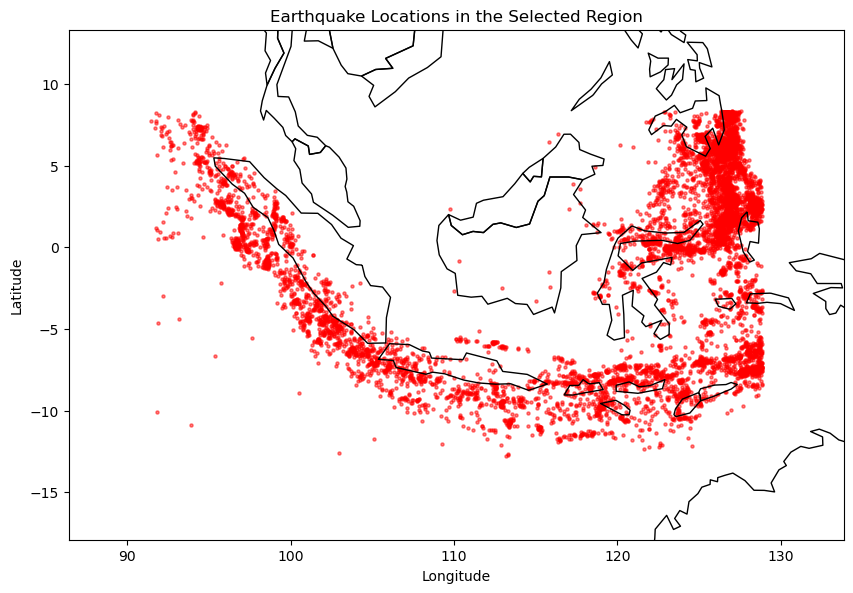

In [2]:
# Plot map of investigating region
df_geo = gpd.GeoDataFrame(data_modified, geometry = gpd.points_from_xy(df.longitude, df.latitude))

# Load the world map (downloaded from Natural Earth)
# Make sure you point this to the correct file location where the shapefiles are extracted
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Defining the extent (bounding box) of the map region 
min_lon, max_lon = 91.406 - 5, 128.848 + 5  # Longitude range
min_lat, max_lat = -12.897 - 5, 8.32 + 5 # Latitude range

# Plot the selected region
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, linewidth=1, color='black')
df_geo.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Set xlim and ylim to focus on the specifc area we have chosen
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Specify labels for x and y
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Earthquake Locations in the Selected Region')
plt.show()

## Plotting a graph of the number of earthquakes over time

C:\Users\20233897\AppData\Local\Temp\ipykernel_14572\2952785249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'year'] = data_modified['time'].dt.year


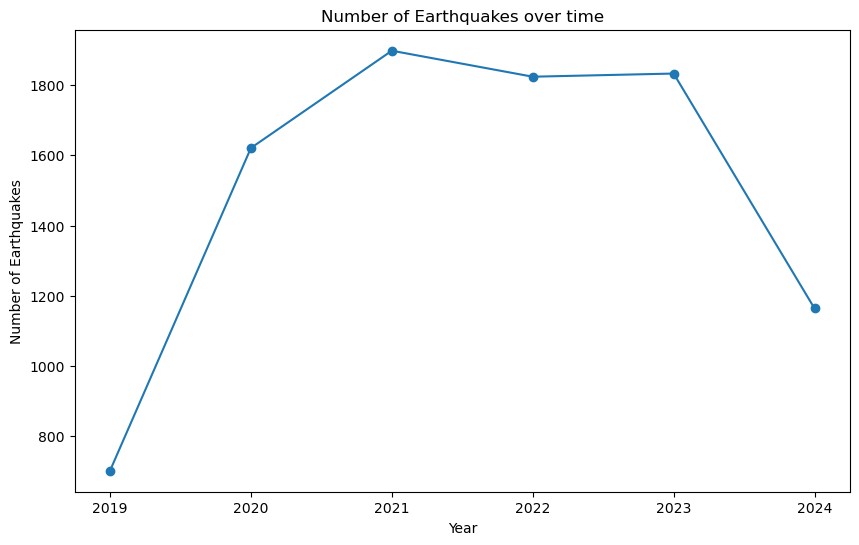

In [3]:
# Group the activities by year and count the number of earthquakes
data_modified.loc[:, 'year'] = data_modified['time'].dt.year

earthquakes_per_year = data_modified.groupby('year').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o')
plt.title('Number of Earthquakes over time')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

## Ploting a graph of the seasonal effect to number of earthquakes

C:\Users\20233897\AppData\Local\Temp\ipykernel_14572\985128651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'month'] = data_modified['time'].dt.month


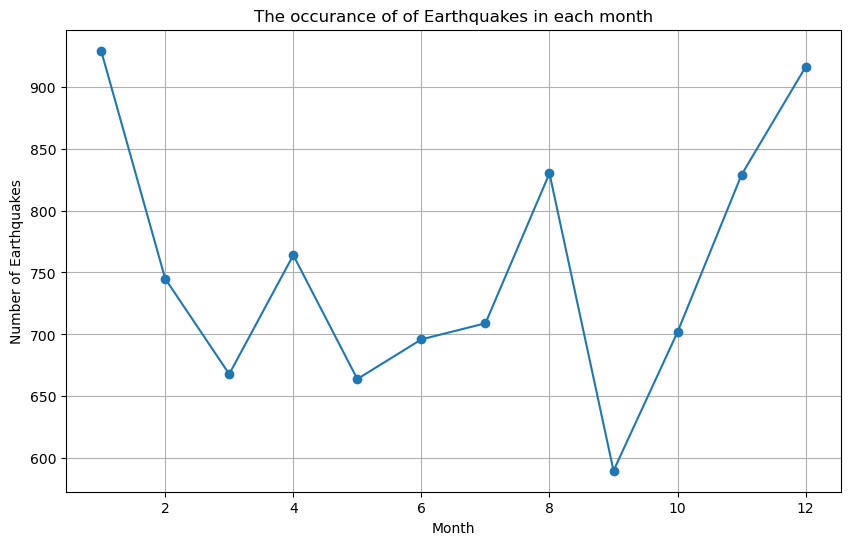

In [4]:
# Group the activities by month and count the number of earthquakes
data_modified.loc[:, 'month'] = data_modified['time'].dt.month

earthquakes_per_month = data_modified.groupby('month').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.plot(earthquakes_per_month.index, earthquakes_per_month.values, marker='o')
plt.title('The occurance of of Earthquakes in each month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

## Plotting the distribution of the magnitude of the earthquakes

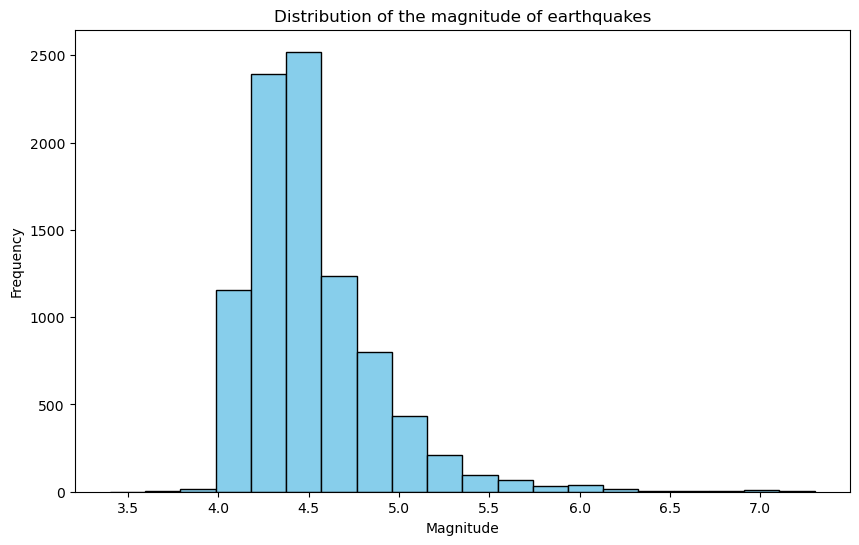

count    9042.000000
mean        4.495211
std         0.377416
min         3.400000
25%         4.300000
50%         4.400000
75%         4.600000
max         7.300000
Name: mag, dtype: float64


In [5]:
# Plot the distribution of the magnitude of earthquakes
plt.figure(figsize=(10,6))
plt.hist(data_modified['mag'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of the magnitude of earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of magnitudes
print(df['mag'].describe())

## Distribution Fitting

In [6]:
# Create an extra column in the dataframe for the inter arrival times
# The inter arrival times are calculated by taking the difference between the times of arrival using the .diff() function
# The differences in seconds are divided by 60 in order to give the answer in minutes
data_modified['inter_arrival_time'] = data_modified['time'].diff().dt.total_seconds() / 60
data_modified['inter_arrival_time'].info()
data_modified['inter_arrival_time'].head()
# For the first arrival there will not exist an inter arrival time and therefore the row is droped using the .dropna() function
interarrivals = data_modified['inter_arrival_time'].dropna()

<class 'pandas.core.series.Series'>
RangeIndex: 9042 entries, 0 to 9041
Series name: inter_arrival_time
Non-Null Count  Dtype  
--------------  -----  
9041 non-null   float64
dtypes: float64(1)
memory usage: 70.8 KB


C:\Users\20233897\AppData\Local\Temp\ipykernel_14572\796072100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['inter_arrival_time'] = data_modified['time'].diff().dt.total_seconds() / 60


In [7]:
interarrivals.describe()

count    9041.000000
mean      290.895807
std       340.012314
min         0.033100
25%        57.252367
50%       174.926467
75%       400.201433
max      3725.878900
Name: inter_arrival_time, dtype: float64

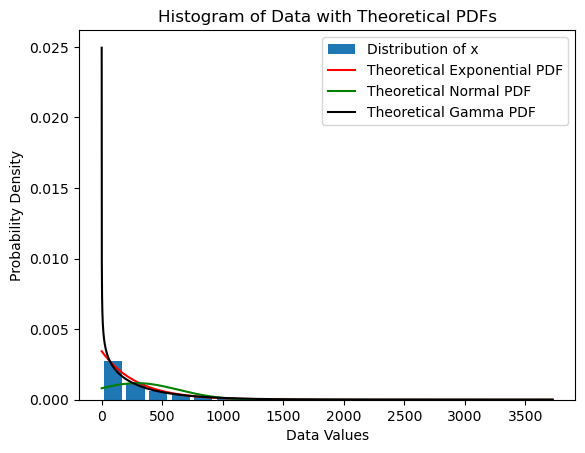

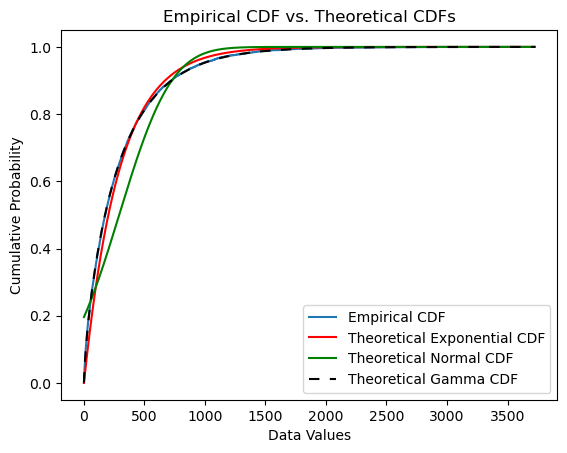

ktest Exp: KstestResult(statistic=0.07460532950794346, pvalue=3.2906706915158063e-44)
ktest Norm: KstestResult(statistic=0.1961386185166058, pvalue=3.2332217636092607e-305)
ktest Gamma: KstestResult(statistic=0.007171000656235882, pvalue=0.7383481182496745)


In [8]:
x = interarrivals
# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1 = np.mean(x)
M2 = np.mean(x**2)
# The known function is: E[X] = 1 / lambda, this can be rewritten as lambda = 1 / E[X]
# This will finally be written as: estimation_lambda = 1 / estimation_X
# This formula will be used to estimate lambda
lamEst = 1 / M1
# An exponential distribution is created with scale 1 / estimation of lambda
estExpDist = stats.expon(scale=1/lamEst)

# A normal distribution is created by using the mean and standard deviation of x (= inter arrival times) to estimate mu and sigma.
# E[X] = mu, Var[X] = sigma**2, E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
# mu = M1 (= estimation of x) and sigma**2 = M2 - M1**2
muEst = M1
sigmaEst = np.sqrt(M2 - M1**2)
estNormDist = stats.norm(muEst, sigmaEst)

# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
# Alpha is estimated as M1**2 / (M2 - M1**2)
alphaEst = M1**2 / (M2 - M1**2)
# Beta is estimated as M1 / (M2 - M1**2)
betaEst = M1 / (M2 - M1**2)
# A gamma distribution is created using the estimated alpha and beta.
estGammaDist = stats.gamma(alphaEst, scale=1/betaEst)

# Creating array serving as x-coordinates for plotting the theoretical PDF's
# Use of min(x) and max(x) to ensure that xs has the same range as x
xs = np.arange(min(x), max(x), 0.1)
# Visualising the distribution of x together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure()
# Plot distribution of X as a blue histogram
plt.hist(x, rwidth = 0.8, bins=20, density=True, label = 'Distribution of x')
# Plot the theoretical exponential PDF as a solid red line
plt.plot(xs, estExpDist.pdf(xs), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical normal PDF as a solid green line
plt.plot(xs, estNormDist.pdf(xs), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical gamma PDF as a solid black line
plt.plot(xs, estGammaDist.pdf(xs), 'black', label = 'Theoretical Gamma PDF')
plt.title('Histogram of Data with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2 = np.sort(x)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys = np.arange(1/len(x), 1 + 1/len(x), 1/len(x))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2, ys, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs, estExpDist.cdf(xs), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs, estNormDist.cdf(xs), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dotted black line to make it clearer
plt.plot(xs, estGammaDist.cdf(xs), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
plt.title('Empirical CDF vs. Theoretical CDFs')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

# Perform the Kolmogorov-Smirnov test as a goodness of fit test
# The null hypothesis suggests that the empirical distribution function tends to the chosen distribution function of the random variable
# The null hypothesis will be rejected if the p-value is less than the significance level (0.05, for alpha = 0.95)
print("ktest Exp:", stats.kstest(x, estExpDist.cdf))
print("ktest Norm:", stats.kstest(x, estNormDist.cdf))
print("ktest Gamma:", stats.kstest(x, estGammaDist.cdf))

# Stochastic Simulation

## Method 1: Sampling over the two types of earthquakes

## Method 2: Sampling over all earthquakes

In [9]:
def simEarthquakes(alpha, beta, T):
    Nt = 0
    interArrDist = stats.gamma(alpha, scale=1/beta)
    t = interArrDist.rvs()
    
    while t < T:
        Nt += 1
        t += interArrDist.rvs()
        
    return Nt

T = 365*24*60

nrRuns = 1000
sim = [simEarthquakes(alphaEst, betaEst, T) for _ in range(nrRuns)]
sample_mean = np.mean(sim)
sample_std = np.std(sim)

print(f'Mean N(T): {sample_mean}')
print(f'Standard Deviation N(T): {sample_std}')

halfwidth = 1.96 * sample_std / np.sqrt(nrRuns)
print(f'Confidence interval mean: {(sample_mean - halfwidth, sample_mean + halfwidth)}')
print(f'Confidence interval mean: {sample_mean} +/- {halfwidth}')

from statsmodels.stats.weightstats import DescrStatsW
ci = DescrStatsW(sim).tconfint_mean(alpha=0.05)
print(f'Confidence interval mean (DescrStatsW): {ci}')

Mean N(T): 1811.045
Standard Deviation N(T): 45.27536830330594
Confidence interval mean: (1808.238803599468, 1813.8511964005322)
Confidence interval mean: 1811.045 +/- 2.8061964005322224
Confidence interval mean (DescrStatsW): (1808.2340454237956, 1813.8559545762046)


Text(0, 0.5, 'Frequency')

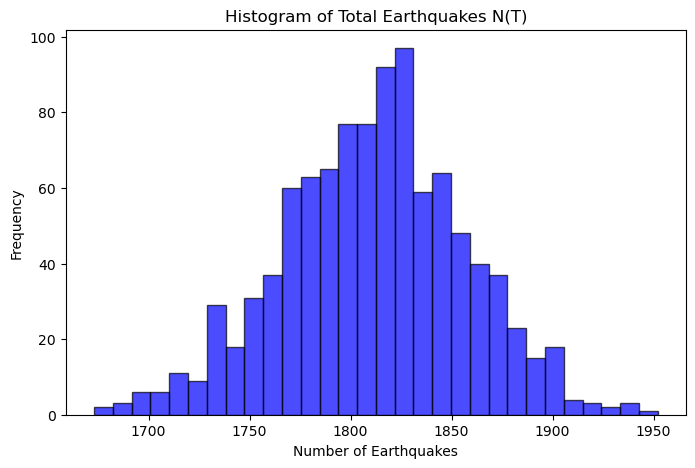

In [10]:
# Plot histogram for N(T)
plt.figure(figsize=(8, 5))
plt.hist(sim, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Total Earthquakes N(T)')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Frequency')

In [11]:
def NrTypesEarthquakes(probType1, probType2, sim):
    NrType1 = []
    NrType2 = []
    
    for eq in sim:
        NrType1.append(probType1 * eq)
        NrType2.append(probType2 * eq)
    
    return NrType1, NrType2

probType1 = 0.3 # To test
probType2 = 0.7 # To test

NrType1, NrType2 = NrTypesEarthquakes(probType1, probType2, sim)

MeanType1 = np.mean(NrType1)
print(f'Mean N1(T): {MeanType1}')
StdType1 = np.std(NrType1)
print(f'Standard Deviation N1(T): {StdType1}')

MeanType2 = np.mean(NrType2)
print(f'Mean N2(T): {MeanType2}')
StdType2 = np.std(NrType2)
print(f'Standard Deviation N2(T): {StdType2}')

Mean N1(T): 543.3135
Standard Deviation N1(T): 13.582610490991783
Mean N2(T): 1267.7315
Standard Deviation N2(T): 31.692757812314152


Text(0, 0.5, 'Frequency')

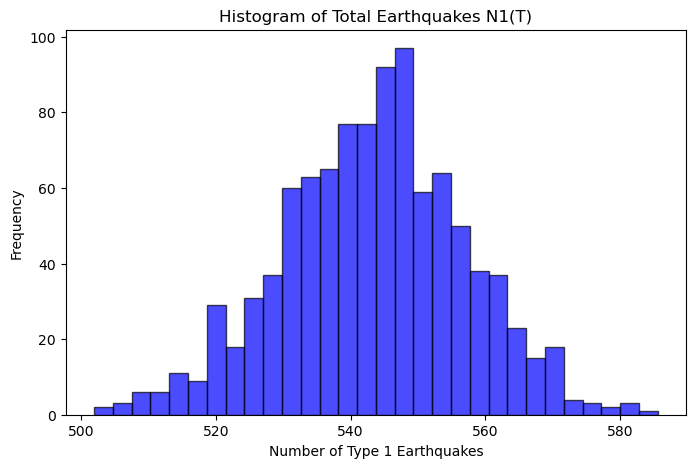

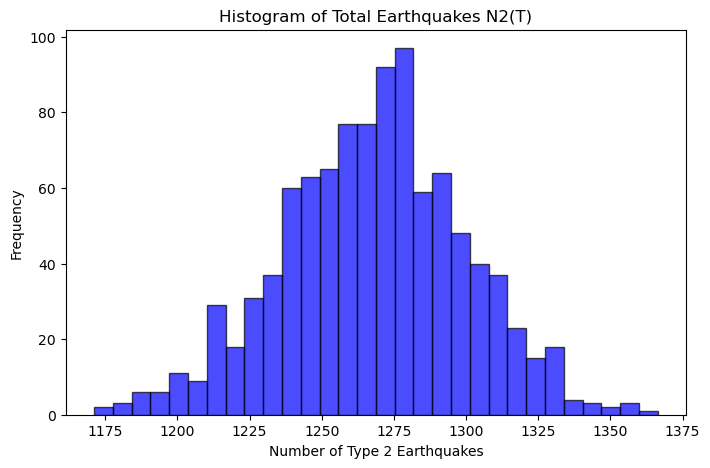

In [12]:
# Plot histogram for N1(T)
plt.figure(figsize=(8, 5))
plt.hist(NrType1, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Total Earthquakes N1(T)')
plt.xlabel('Number of Type 1 Earthquakes')
plt.ylabel('Frequency')

# Plot histogram for N1(T)
plt.figure(figsize=(8, 5))
plt.hist(NrType2, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Total Earthquakes N2(T)')
plt.xlabel('Number of Type 2 Earthquakes')
plt.ylabel('Frequency')